<a href="https://colab.research.google.com/github/RicardoMesquitaCastro/Back-end-C/blob/main/Atividade_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade de IA
Nome: Ricardo Mesquita e Castro


# Email Spam
Ham and Spam emails from SpamAssasin

O tema foi escolhido no website do Kaggle, link de acesso: https://www.kaggle.com/datasets/veleon/ham-and-spam-dataset

#Introdução

O aumento no volume de e-mails indesejados chamados spam criou uma necessidade intensa para o desenvolvimento de filtros antispam mais confiáveis ​​e robustos. Quaisquer mensagens promocionais ou anúncios que cheguem à nossa caixa de entrada podem ser categorizados como spam, pois não fornecem nenhum valor e muitas vezes nos irritam.

# Essa atividade será dividida nos seguintes tópicos:
* Importar os pacotes necessários;
* Carregar o conjunto de dados;
* Remover as colunas de dados indesejadas;
* Pré-processamento e exploração do conjunto de dados;
* Criar uma nuvem de palavras para ver qual mensagem é spam e qual não é;
* Remover as palavras de parada e pontuação;
* Converter os dados de texto em vetores.
# Construindo um modelo de classificação de spam sms
* Dividir os dados em conjuntos de treinamento e teste
* Usar os classificadores embutidos do Sklearn para construir os modelos
* Treinar os dados no modelo
* Fazer previsões sobre novos dados



#Dependências 

In [163]:
import pandas as pd  # data processing, CSV file I/O (e. g. pd.read_CSV)
from sklearn.model_selection import train_test_split # separação/amostragem dos dados de treino e os dados de teste
from sklearn.feature_extraction.text import CountVectorizer  #transformar um determinado texto em um vetor 
from sklearn import svm 


* Pandas : é uma biblioteca usada principalmente  para limpeza e análise de dados.
* Scikit-learn: é uma biblioteca robusta para aprendizado de máquina em Python. Ele fornece uma seleção de ferramentas eficientes para aprendizado de máquina e modelagem estatística, incluindo classificação, regressão, agrupamento e redução de dimensionalidade por meio de uma interface consistente.


#Montando o drive pessoal 

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Pré-processamento de dados

In [165]:

read = pd.read_csv("/content/drive/MyDrive/Spam /spam.csv",encoding="ISO-8859-1")


#Tabela importada

In [166]:
read

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#Excluindo colunas desnecessárias

Na figura acima, podemos ver que existem algumas colunas sem nome e o rótulo e o nome da coluna de texto não são intuitivos, então vamos corrigi-los nesta etapa.

In [167]:
read = read.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
read = read.rename(columns={"v2" : "text", "v1":"label"})
read[1990:2000]


,label,text
1990,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...
1991,ham,No other Valentines huh? The proof is on your ...
1992,spam,Free tones Hope you enjoyed your new content. ...
1993,ham,Eh den sat u book e kb liao huh...
1994,ham,Have you been practising your curtsey?
1995,ham,Shall i come to get pickle
1996,ham,Lol boo I was hoping for a laugh
1997,ham,\YEH I AM DEF UP4 SOMETHING SAT
1998,ham,"Well, I have to leave for my class babe ... Yo..."
1999,ham,LMAO where's your fish memory when I need it?


#Crie uma nuvem de palavras para ver qual mensagem é spam e qual não é
#Pré-processamento e exploração do conjunto de dados

In [168]:
from wordcloud import WordCloud #palavras que mais saiam nos emails
import matplotlib.pyplot as plt #plotar as palavras no quadro (por tamanho)
# Import nltk packages and Punkt Tokenizer Models
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


A variavéis a baixo armazenaram as palavras ham e spam

In [169]:
spam_words = ''
ham_words = ''


As funções a baixo são para criar o quadro de palavras Spam e nuvem de palavras ham.

In [182]:
# Criando um corpus de mensagens de spam
for val in read[read['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

# Criando um corpus de mensagens ham
for val in read[read['label'] == 'ham'].text:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [181]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

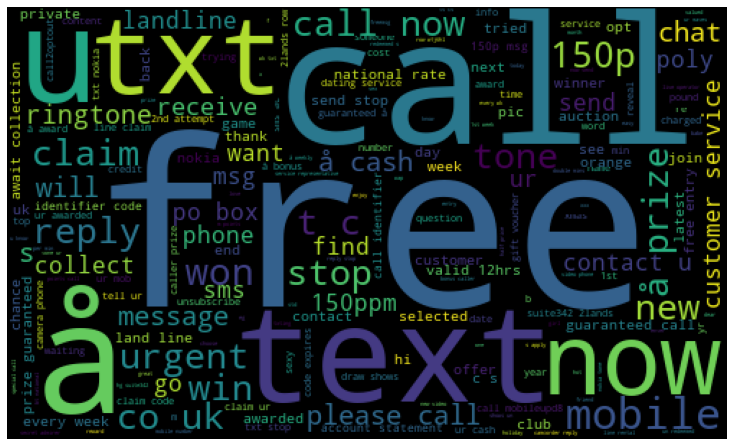

In [172]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

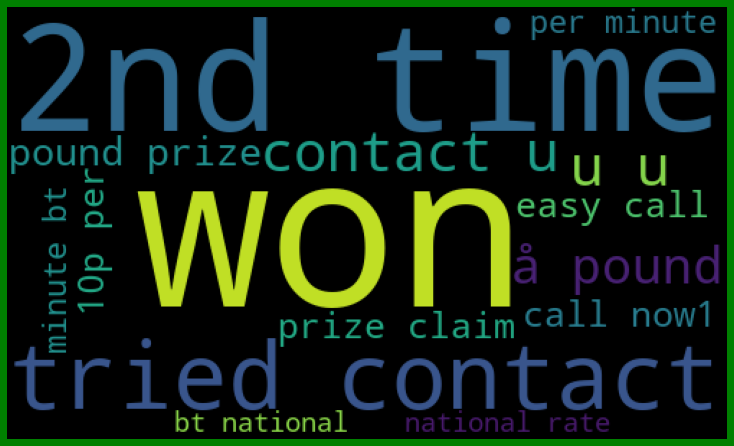

In [183]:
#Creating Ham wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#Transformando os valores em 0 e 1

Agora, podemos converter o `spam` `ham` 0 e 1, respectivamente, para que a máquina possa entender.

In [174]:
read = read.replace(['ham','spam'],[0, 1])
read.head(10)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


#Contagem de e-mails ham e spam.

In [175]:
read['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

#Removendo pontuação e stopwords das mensagens

A pontuação e as palavras de parada não contribuem para o modelo, sendo necessário removê-las. Usando a biblioteca NLTK, podemos fazer isso facilmente.

In [185]:

from nltk.corpus import stopwords

#importando a lista de stopwords e implementando no corpus
import string
def text_process(text):

    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return " ".join(text)

read['text'] = read['text'].apply(text_process)
read.head()

,label,text
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though


#Crie um quadro de dados a partir dos dados processados ​.

In [186]:
text = pd.DataFrame(read['text'])
label = pd.DataFrame(read['label'])

#Convertendo palavras em vetores usando Count Vectorizer

In [187]:
## Contando quantas vezes uma palavra aparece no conjunto de dados

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  11305


In [188]:
# Remover as stopwords e transformar os textos nas variáveis ​​de entrada vetorizadas X

# Classificando em ordem decrescente (a palavra com maior frequência aparece primeiro)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['u', '2', 'call', 'U', 'get', 'Im', 'ur', '4', 'ltgt', 'know', 'go', 'like', 'dont', 'come', 'got', 'time', 'day', 'want', 'Ill', 'lor', 'Call', 'home', 'send', 'going', 'one', 'need', 'Ok', 'good', 'love', 'back', 'n', 'still', 'text', 'im', 'later', 'see', 'da', 'ok', 'think', 'Ì', 'free', 'FREE', 'r', 'today', 'Sorry', 'week', 'phone', 'mobile', 'cant', 'tell', 'take', 'much', 'night', 'way', 'Hey', 'reply', 'work', 'make', 'give', 'new']


#Convertendo palavras em vetores
Podemos converter palavras em vetores usando Count Vectorizer ou usando TF-IDF Vectorizer.

O TF-IDF é melhor do que o Count Vectorizers porque não apenas se concentra na frequência das palavras presentes no corpus, mas também fornece a importância das palavras. Podemos então remover as palavras que são menos importantes para a análise, tornando assim a construção do modelo menos complexa, reduzindo as dimensões de entrada.

Incluí os dois métodos para sua referência.


In [138]:
# Mapping from words to index

vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

In [144]:
# Text to Vector
import numpy as np

def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)




In [146]:
# Converter todos os títulos em vetores
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for i, (_, text_) in enumerate(text.iterrows()):
    word_vectors[i] = text_to_vector(text_[0])

word_vectors.shape

(5572, 11305)

#Convertendo palavras em vetores usando o TF-IDF Vectorizer

In [147]:
#converter os dados de texto em vetores
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(read['text'])
vectors.shape

(5572, 9376)

In [189]:
#features = word_vectors
features = vectors

#Divisão em conjunto de treinamento e teste

In [152]:
#split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(features, read['label'], test_size=0.15, random_state=111)

#Classificando usando os classificadores pré-construídos do sklearn
Nesta etapa, serão usados alguns dos classificadores mais populares e também comparar seus resultados.

# Classificadores usados:
* classificador de spam usando regressão logística;
*classificação de spam de e-mail usando Support Vector Machine (SVM);
* classificador de spam usando naive bayes;
* classificador de spam usando árvore de decisão;
* classificador de spam usando K-Nearest Neighbor (KNN);
* classificador de spam usando Random Forest Classifier.

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [154]:
#inicializando os modelos de classificação
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [155]:
#criando um dicionário de variáveis ​​e modelos
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [156]:
#ajustar os dados aos modelos
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [157]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

#Previsões usando o algoritmo TFIDF Vectorizer

In [158]:
pred_scores_word_vectors

[('SVC', [0.9784688995215312]),
 ('KN', [0.9330143540669856]),
 ('NB', [0.9880382775119617]),
 ('DT', [0.9605263157894737]),
 ('LR', [0.9533492822966507]),
 ('RF', [0.9796650717703349])]

#Previsões do modelo

In [252]:
#escrever funções para detectar se a mensagem é spam ou não
def find(x):
    if x == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [261]:
newtext = ["mobile 11 months U R entitled Update latest colour mobiles camera Free Call Mobile Update Co FREE 08002986030"]
integers = vectorizer.transform(newtext)

In [262]:
x = mnb.predict(integers)
find(x)

Message is SPAM


#Verificando os resultados da classificação com a matriz de confusão

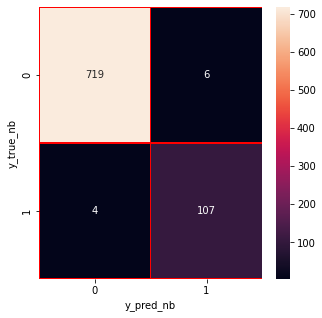

In [162]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Naive Bayes
y_pred_nb = mnb.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

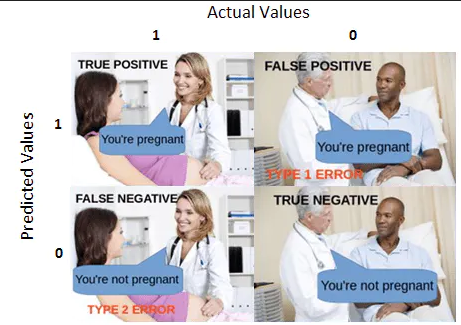


Caso 1: Nosso modelo prevê uma mensagem como spam e na verdade é spam (TP - True Positive)

Caso 2: Nosso modelo prevê uma mensagem como spam, mas na realidade não é (FP - Falso Positivo)

Caso 3: Nosso modelo prevê que uma mensagem não é spam, mas na realidade é spam (FN - Falso Negativo)

Caso 4: Nosso modelo prevê uma mensagem como não spam e, na verdade, não é spam (TN - True Negative)